In [96]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd
from collections import Counter
import numpy as np

In [97]:
data=pd.read_csv('dataset_2019.csv')
data

,Unnamed: 0,index,count,borrow_station,return_station
0,0,"(828, 816)",613.0,828,816
1,1,"(828, 846)",365.0,828,846
2,2,"(828, 828)",322.0,828,828
3,3,"(828, 812)",281.0,828,812
4,4,"(828, 827)",265.0,828,827
...,...,...,...,...,...
516590,516590,"(377, 321)",1.0,377,321
516591,516591,"(377, 844)",1.0,377,844
516592,516592,"(377, 906)",1.0,377,906
516593,516593,"(377, 3534)",1.0,377,3534


In [98]:
df19 = data.copy()[['borrow_station','return_station','count']]
df19

,borrow_station,return_station,count
0,828,816,613.0
1,828,846,365.0
2,828,828,322.0
3,828,812,281.0
4,828,827,265.0
...,...,...,...
516590,377,321,1.0
516591,377,844,1.0
516592,377,906,1.0
516593,377,3534,1.0


In [99]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516595 entries, 0 to 516594
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   borrow_station  516595 non-null  int64  
 1   return_station  516595 non-null  int64  
 2   count           516595 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 11.8 MB


In [100]:
G19 = nx.from_pandas_edgelist(df19,  source='borrow_station', target='return_station', edge_attr='count')

In [101]:
print(nx.info(G19))

Name: 
Type: Graph
Number of nodes: 1563
Number of edges: 333773
Average degree: 427.0928


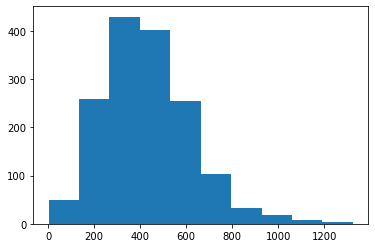

In [9]:
import matplotlib.pyplot as plt
degree19 = nx.degree(G19)

plt.figure()
plt.hist(dict(degree19).values())
plt.show()

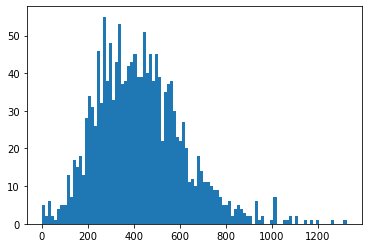

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
h = plt.hist(dict(degree19).values(), 100)

## 연결중심성

In [41]:
deg19 = nx.degree_centrality(G19)

In [18]:
deg19_df = pd.DataFrame(deg19.items(),columns=['station','degree_centrality'])
deg19_df = deg19_df.sort_values(by='degree_centrality' ,ascending=False)
deg19_df

,station,degree_centrality
41,2219,0.848271
30,207,0.811780
149,565,0.768246
58,825,0.749040
24,2002,0.733035
...,...,...
1547,3543,0.005122
1551,99998,0.002561
1561,9999,0.001280
1562,9996,0.001280


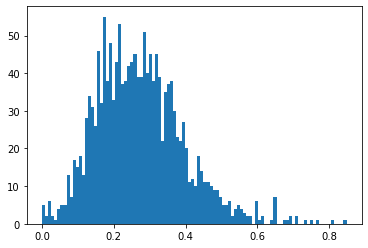

In [11]:
%matplotlib inline
h = plt.hist(dict(deg19).values(), 100)

## Pagerank

In [12]:
pr19 = nx.pagerank(G19, alpha=0.9)

In [13]:
pr19_df=pd.DataFrame(pr19.items(),columns=['station','pagerank'])
pr19_df= pr19_df.sort_values(by='pagerank' ,ascending=False)
pr19_df

,station,pagerank
41,2219,0.001868
30,207,0.001793
149,565,0.001690
58,825,0.001644
24,2002,0.001612
...,...,...
1551,99998,0.000102
1524,2394,0.000100
1548,1687,0.000089
1547,3543,0.000082


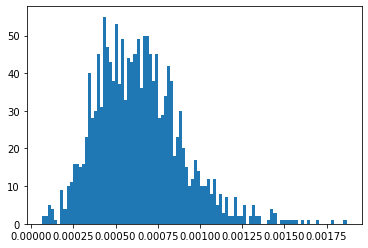

In [14]:
%matplotlib inline
h = plt.hist(dict(pr19).values(), 100)

## 노드 편향성 파악 지표

In [15]:
brw_stn = {}
rtn_stn = {}

In [16]:
for i in range(df19.shape[0]):

    try:
        rtn = int(df19['return_station'][i])
    except ValueError:
        continue
    brw = int(df19['borrow_station'][i])
    
    cnt = int(df19['count'][i])

    if brw_stn.get(brw) is None:
        brw_stn[brw] = cnt
    else:
        brw_stn[brw] += cnt
    
    if rtn_stn.get(rtn) is None:
        rtn_stn[rtn] = (cnt)
    else:
        rtn_stn[rtn] += cnt
    
    if (i % 10000  == 0):
        print(i,'per',df19.shape[0],'is done')
    

0 per 516595 is done
10000 per 516595 is done
20000 per 516595 is done
30000 per 516595 is done
40000 per 516595 is done
50000 per 516595 is done
60000 per 516595 is done
70000 per 516595 is done
80000 per 516595 is done
90000 per 516595 is done
100000 per 516595 is done
110000 per 516595 is done
120000 per 516595 is done
130000 per 516595 is done
140000 per 516595 is done
150000 per 516595 is done
160000 per 516595 is done
170000 per 516595 is done
180000 per 516595 is done
190000 per 516595 is done
200000 per 516595 is done
210000 per 516595 is done
220000 per 516595 is done
230000 per 516595 is done
240000 per 516595 is done
250000 per 516595 is done
260000 per 516595 is done
270000 per 516595 is done
280000 per 516595 is done
290000 per 516595 is done
300000 per 516595 is done
310000 per 516595 is done
320000 per 516595 is done
330000 per 516595 is done
340000 per 516595 is done
350000 per 516595 is done
360000 per 516595 is done
370000 per 516595 is done
380000 per 516595 is done


In [17]:
len(brw_stn.keys())

1562

In [18]:
T = {}
for key in brw_stn.keys():
    brw_count = brw_stn[key]
    rtn_count = 0
    if rtn_stn.get(key) is not None:
        rtn_count = rtn_stn[key]
    T[key] = (rtn_count - brw_count) / (rtn_count + brw_count)
        

In [19]:
rtn_stn

{816: 26303,
 846: 7461,
 828: 7534,
 812: 4586,
 827: 2442,
 834: 15005,
 818: 13248,
 800: 14290,
 813: 9837,
 819: 9014,
 829: 24146,
 826: 10974,
 817: 6167,
 820: 7203,
 807: 7964,
 835: 8273,
 841: 18091,
 805: 9900,
 811: 3296,
 832: 20343,
 838: 10761,
 379: 11002,
 844: 9475,
 815: 14162,
 2002: 34298,
 831: 4091,
 810: 4419,
 840: 4368,
 843: 7120,
 806: 10044,
 207: 97016,
 2024: 10399,
 171: 6319,
 324: 13265,
 313: 4355,
 836: 8770,
 215: 11771,
 2050: 26395,
 399: 3056,
 327: 12914,
 2015: 17688,
 2219: 60320,
 435: 3753,
 845: 6405,
 312: 19497,
 2058: 17520,
 2070: 13585,
 2013: 13344,
 823: 2687,
 311: 18399,
 198: 5481,
 384: 4558,
 822: 3248,
 144: 31058,
 180: 7947,
 158: 6803,
 257: 26682,
 2026: 4085,
 825: 25205,
 458: 12368,
 2003: 12839,
 830: 5063,
 2007: 11555,
 216: 12962,
 2054: 8901,
 802: 3667,
 145: 13201,
 2025: 26720,
 249: 19256,
 2069: 5199,
 310: 7603,
 351: 6820,
 173: 7137,
 157: 14973,
 2215: 7383,
 248: 25217,
 2027: 7490,
 839: 6828,
 395: 8795

In [20]:
brw_stn

{828: 7328,
 841: 16722,
 111: 16726,
 534: 3589,
 112: 16229,
 839: 6106,
 837: 15187,
 809: 7319,
 810: 4465,
 2302: 16003,
 1326: 7155,
 565: 36051,
 217: 15713,
 845: 6345,
 2303: 10912,
 542: 18939,
 510: 11828,
 2328: 7004,
 210: 44342,
 507: 13267,
 583: 34768,
 2277: 8165,
 2262: 24242,
 1532: 6144,
 1359: 6393,
 2025: 25942,
 832: 19170,
 106: 37893,
 1265: 21001,
 808: 3918,
 2357: 6486,
 2301: 22549,
 815: 13206,
 2396: 6281,
 2308: 7843,
 2319: 5889,
 147: 20977,
 825: 21498,
 840: 4384,
 128: 22742,
 2003: 13209,
 829: 24854,
 439: 14629,
 160: 8136,
 382: 6289,
 2361: 8337,
 818: 12749,
 843: 9457,
 831: 5183,
 1373: 6622,
 118: 15144,
 2002: 33430,
 514: 19102,
 630: 15996,
 641: 17669,
 537: 13337,
 525: 29697,
 2221: 9915,
 3525: 8087,
 107: 24917,
 2026: 4185,
 811: 5702,
 3536: 16721,
 3508: 23988,
 146: 23526,
 216: 12535,
 2219: 59095,
 274: 31541,
 540: 19140,
 2037: 6541,
 3511: 25625,
 1663: 26660,
 224: 15972,
 2503: 7933,
 502: 97677,
 2349: 6360,
 247: 42653,

In [21]:
rtn19=pd.DataFrame(rtn_stn.items(),columns=['station','N_in'])
brw19=pd.DataFrame(brw_stn.items(),columns=['station','N_out'])

In [22]:
deg19_df.to_csv('degree19.csv')
pr19_df.to_csv('pagerank19.csv')
rtn19.to_csv('rtn19.csv')
brw19.to_csv('brw19.csv')

# 네트워크 추가 분석

In [42]:
nx.density(G19)

0.27342686959891144

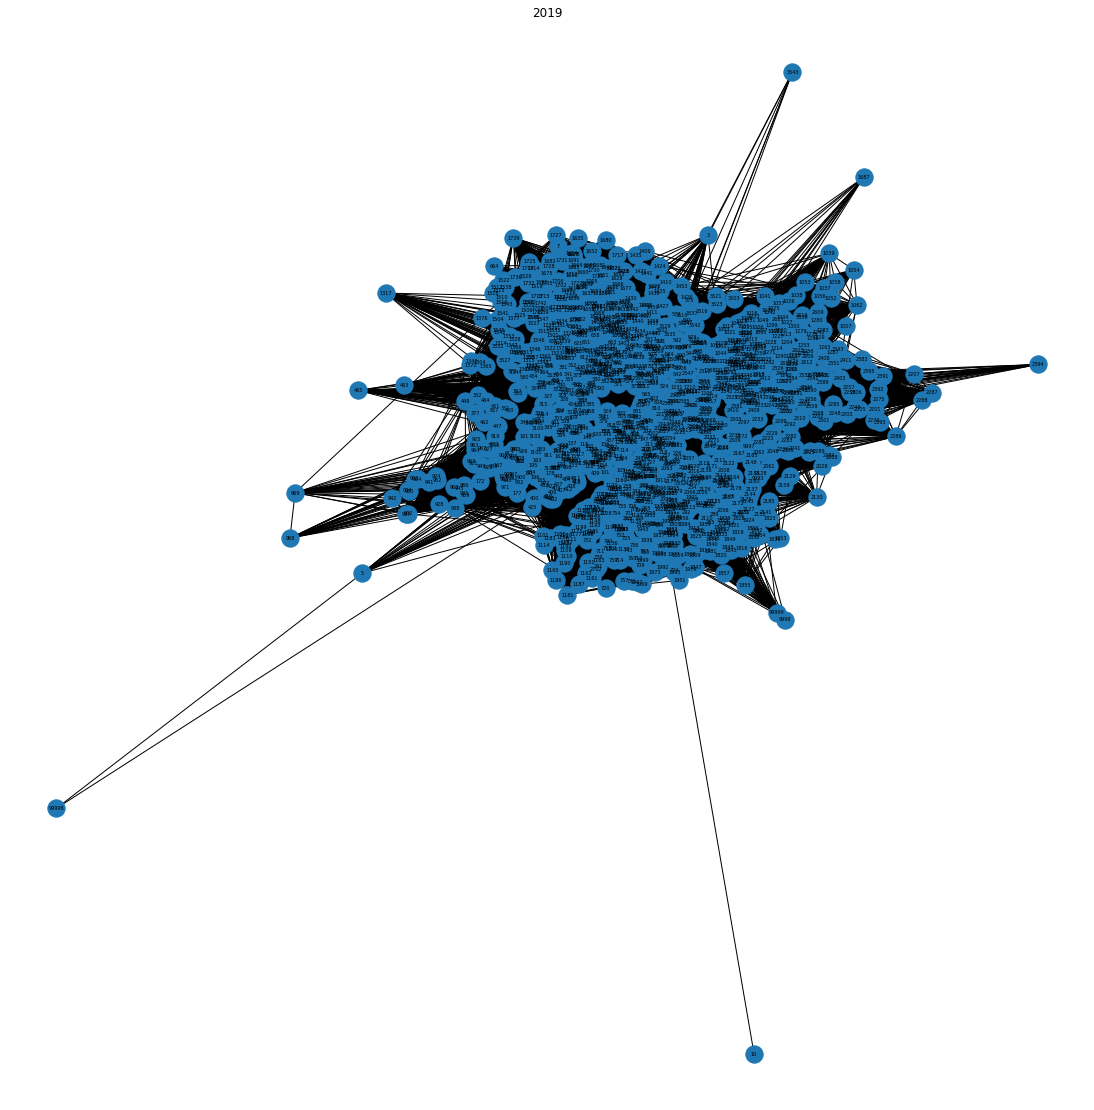

In [109]:
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G19)
nx.draw(G19, pos, with_labels=True, font_size = 5)
edge_weight = nx.get_edge_attributes(G19, 'weight')
nx.draw_networkx_edge_labels(G19, pos, edge_labels = edge_weight)
#nx.draw_networkx_edge_labels(G19, pos, edge_labels = edge_weight, node_size=[5 + v[1]*5 for v in deg19], with_labels=True)
plt.title("2019")
plt.show()

In [102]:
a=[9996,9999]
G19.remove_nodes_from(a)

In [33]:
nx.clustering(G19)

{828: 0.5432469885939665,
 816: 0.3913619981658557,
 846: 0.6268471584471346,
 812: 0.5575146246788037,
 827: 0.7831376282661588,
 834: 0.503661320859784,
 818: 0.5308468413876686,
 800: 0.49584322216207966,
 813: 0.49782293178519593,
 819: 0.5221512131715771,
 829: 0.37031681694102075,
 826: 0.5152584342503095,
 817: 0.52346781015723,
 820: 0.5203390748564619,
 807: 0.4975927300447351,
 835: 0.5334222741043386,
 841: 0.4060743178390237,
 805: 0.5580762604173976,
 811: 0.5466794548520335,
 832: 0.4063615709185329,
 838: 0.5111827876997306,
 379: 0.48353885042312345,
 844: 0.545579056247102,
 815: 0.4482708363037245,
 2002: 0.35821485536724723,
 831: 0.5278878390734533,
 810: 0.5287422078434467,
 840: 0.5519644821625019,
 843: 0.44704339306595875,
 806: 0.47048482087918236,
 207: 0.3297067106257298,
 2024: 0.46565441036387883,
 171: 0.5613448768892046,
 324: 0.48541230735078295,
 313: 0.5633604874272057,
 836: 0.4839784591713375,
 215: 0.42102759942367146,
 2050: 0.45726537104917353,
 3

In [78]:
nx.average_clustering(G19)

0.6120258618029237

In [84]:
from networkx.algorithms.community import greedy_modularity_communities
c=list(greedy_modularity_communities(G19))
sorted(c[0])

[3,
 7,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 361,
 362,
 363,
 364,
 371,
 372,
 373,
 374,
 375,
 378,
 380,
 381,
 382,
 383,
 386,
 387,
 388,
 393,
 429,
 430,
 431,
 434,
 452,
 455,
 456,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 529,
 530,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 542,
 543,
 544,
 546,
 548,
 549,
 550,
 551,
 552,
 553,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 567,
 568,
 569,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 600,
 601,
 602,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 612,
 613,
 614,
 615,
 616,
 617,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 630,
 631,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 646,
 647,
 648,
 650,
 651,
 652,
 654,
 656,
 657,
 658,
 659,
 660,
 6

In [88]:
pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.15-py3-none-any.whl size=9406 sha256=6b5672ad5c559fb0624b943a1ef9c72c3060297f6075dfb6e36561a830f41618
  Stored in directory: c:\users\leejo\appdata\local\pip\cache\wheels\c8\68\21\d04741956802581119d875a0d9fce6895e8f9ffae71223f3e3
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [104]:
import community as community_louvain
import matplotlib.cm as cm

partition=community_louvain.best_partition(G19)


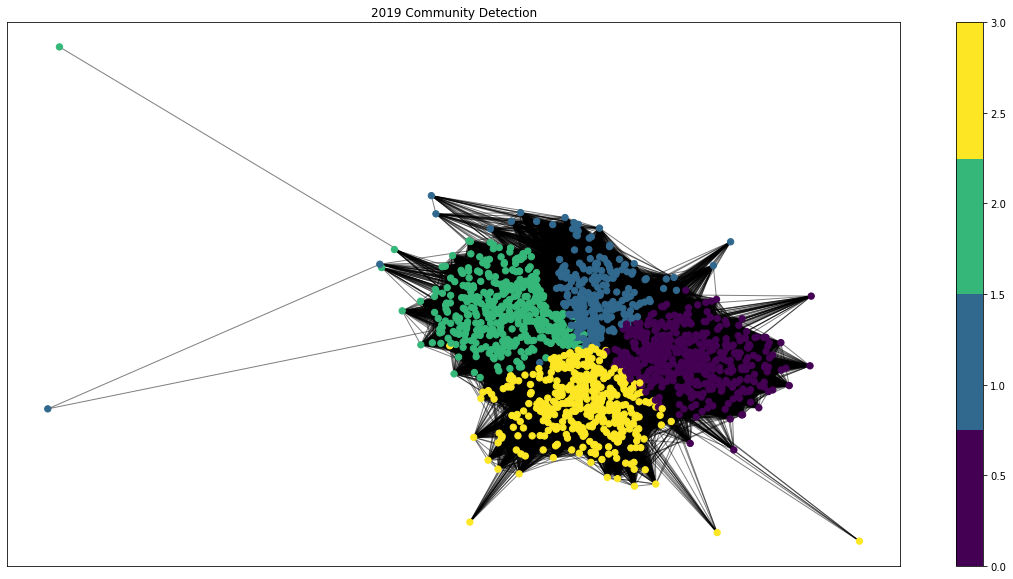

In [108]:
plt.figure(figsize=(20,10))
pos=nx.spring_layout(G19)
cmap=cm.get_cmap('viridis', max(partition.values())+1)
im=nx.draw_networkx_nodes(G19, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G19, pos, alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.colorbar(im)
plt.title('2019 Community Detection')
plt.show(block=False)

In [114]:
partition.values()

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 3, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 0, 2, 1, 2, 2, 2, 3, 1, 3, 2, 2, 0, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 1, 3, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 2, 0, 0, 3, 3, 1, 3, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 2, 2, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 3, 1, 0, 3, 2, 1, 0, 2, 3, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 3, 2, 0, 1, 1, 1, 0, 1, 3, 2, 1, 2, 1, 2, 0, 1, 1, 3, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 2, 2, 1, 1, 2, 2, 0, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 